In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GOOG.csv')
data = df['Close'].values.reshape(-1, 1)  
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [3]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [4]:
sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [5]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

C:\Users\sachin rathod\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0090 - val_loss: 0.0016
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.0988e-04 - val_loss: 5.8126e-04
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.1136e-04 - val_loss: 0.0012
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.6608e-04 - val_loss: 6.7585e-04
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.2815e-04 - val_loss: 9.9245e-04
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6289e-04 - val_loss: 4.3654e-04
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4991e-04 - val_loss: 4.9553e-04
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3775e-04 - val_loss: 5.0014e-04
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.0410e-04 - val_loss: 9.1017e-04
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5699e-04 - val_loss: 8.1047e-04
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9329e-04 - val_loss

In [7]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3337e-04
Test Loss: 0.00035728560760617256
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


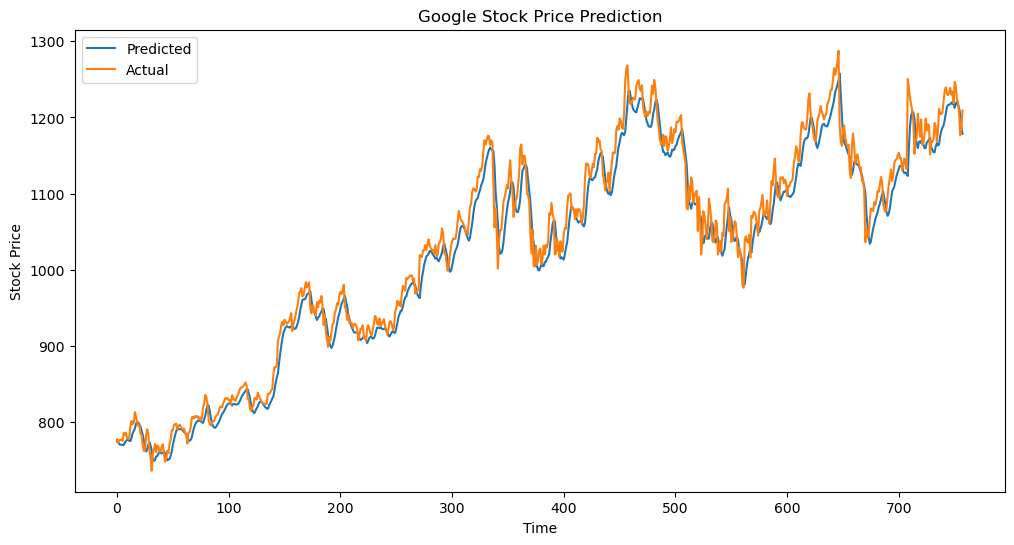

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()